---

#  mplfinance xticks experiments

---

In [1]:
# This allows multiple outputs from a single jupyter notebook cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
%matplotlib inline
import pandas as pd

### Read in daily data for the S&P 500 from November of 2019 

In [3]:
df = pd.read_csv('../data/SP500_NOV2019_IDay.csv',index_col=0,parse_dates=True)
df.index.name = 'Date'
df.shape
df.head(2)
df.tail(2)

(1563, 5)

,Open,Close,High,Low,Volume
Date,,,,,
2019-11-05 09:30:00,3080.80,3080.49,3081.47,3080.30,0
2019-11-05 09:31:00,3080.33,3079.36,3080.33,3079.15,0


,Open,Close,High,Low,Volume
Date,,,,,
2019-11-08 15:58:00,3090.73,3091.04,3091.13,3090.58,0
2019-11-08 15:59:00,3091.16,3092.91,3092.91,3090.96,0


In [4]:
df.index.to_pydatetime()

array([datetime.datetime(2019, 11, 5, 9, 30),
       datetime.datetime(2019, 11, 5, 9, 31),
       datetime.datetime(2019, 11, 5, 9, 32), ...,
       datetime.datetime(2019, 11, 8, 15, 57),
       datetime.datetime(2019, 11, 8, 15, 58),
       datetime.datetime(2019, 11, 8, 15, 59)], dtype=object)

In [5]:
import mplfinance as mpf
mpf.__version__

'0.12.7a11'

/home/dino/code/mplfinance/src/mplfinance/_arg_validators.py:35: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


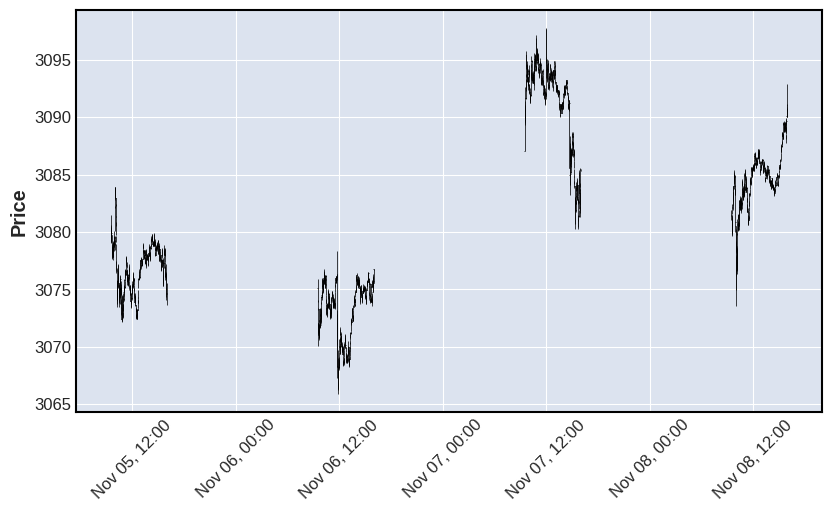

In [6]:
fig, axlist = mpf.plot(df,figratio=(9,5),returnfig=True,show_nontrading=True)

In [7]:
df['TimeStamp'] = df.index.values

In [8]:
df.head()

,Open,Close,High,Low,Volume,TimeStamp
Date,,,,,,
2019-11-05 09:30:00,3080.80,3080.49,3081.47,3080.30,0,2019-11-05 09:30:00
2019-11-05 09:31:00,3080.33,3079.36,3080.33,3079.15,0,2019-11-05 09:31:00
2019-11-05 09:32:00,3079.43,3079.68,3080.46,3079.43,0,2019-11-05 09:32:00
2019-11-05 09:33:00,3079.73,3079.15,3080.22,3079.12,0,2019-11-05 09:33:00
2019-11-05 09:34:00,3079.20,3079.62,3080.03,3079.07,0,2019-11-05 09:34:00


In [9]:
df['TSdate'] = [t.date() for t in df['TimeStamp']]

In [10]:
dfg = df.groupby('TSdate')

In [11]:
dfg.first()
dfg.last()
dfg.median()
#dir(dfg)

,Open,Close,High,Low,Volume,TimeStamp
TSdate,,,,,,
2019-11-05,3080.80,3080.49,3081.47,3080.30,0,2019-11-05 09:30:00
2019-11-06,3075.10,3074.12,3075.91,3073.90,0,2019-11-06 09:30:00
2019-11-07,3087.02,3089.93,3090.17,3087.02,0,2019-11-07 09:30:00
2019-11-08,3081.25,3081.47,3081.93,3081.07,0,2019-11-08 09:30:00


,Open,Close,High,Low,Volume,TimeStamp
TSdate,,,,,,
2019-11-05,3074.78,3074.75,3074.78,3074.75,0,2019-11-05 16:00:00
2019-11-06,3076.74,3076.73,3076.74,3076.72,0,2019-11-06 16:00:00
2019-11-07,3085.41,3085.35,3085.44,3085.35,0,2019-11-07 16:00:00
2019-11-08,3091.16,3092.91,3092.91,3090.96,0,2019-11-08 15:59:00


,Open,Close,High,Low,Volume
TSdate,,,,,
2019-11-05,3077.300,3077.270,3077.530,3077.060,0
2019-11-06,3073.970,3073.970,3074.270,3073.790,0
2019-11-07,3092.590,3092.580,3092.790,3092.380,0
2019-11-08,3084.785,3084.805,3084.965,3084.595,0


In [12]:
xt = []
for t in dfg.first()['TimeStamp']:
    xt.append(df.index.get_loc(t))

In [13]:
xt

[0, 391, 782, 1173]

In [14]:
axlist[0].set_xticks(xt)

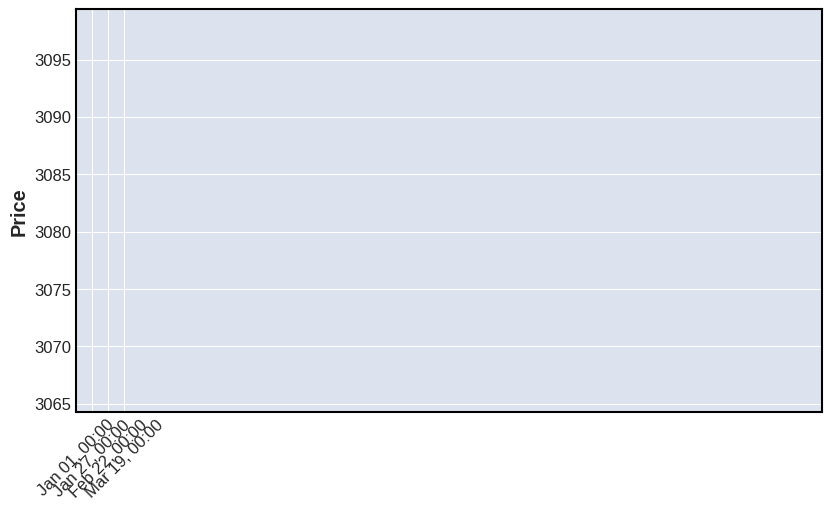

In [15]:
fig

In [16]:
xt = []
for t1,t2 in zip(dfg.first()['TimeStamp'],dfg.last()['TimeStamp']):
    print('t1,t2,t2-t1=',t1,t2,t2-t1)

t1,t2,t2-t1= 2019-11-05 09:30:00 2019-11-05 16:00:00 0 days 06:30:00
t1,t2,t2-t1= 2019-11-06 09:30:00 2019-11-06 16:00:00 0 days 06:30:00
t1,t2,t2-t1= 2019-11-07 09:30:00 2019-11-07 16:00:00 0 days 06:30:00
t1,t2,t2-t1= 2019-11-08 09:30:00 2019-11-08 15:59:00 0 days 06:29:00


In [17]:
td = t2-t1

In [18]:
td.seconds
td.total_seconds()

23340

23340.0

In [19]:
23340 / (60*60)
int(23340 / (60*60))/2

6.483333333333333

3.0

In [20]:
#STOP HERE

/home/dino/code/mplfinance/src/mplfinance/_arg_validators.py:35: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


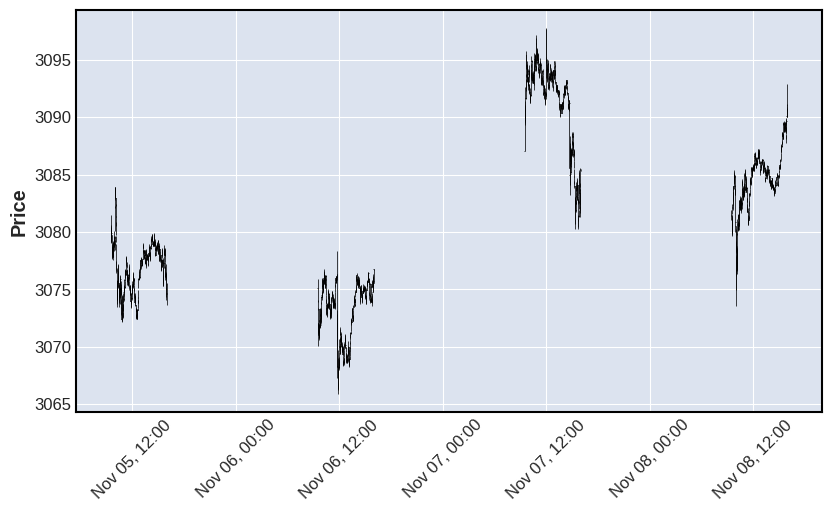

In [21]:
#del fig
#fig, axlist = mpf.plot(df,figratio=(9,5),returnfig=True,show_nontrading=True)
fig, axlist = mpf.plot(df,figratio=(9,5),returnfig=True,show_nontrading=True)

In [22]:
axlist[0].get_xticks()

array([18205. , 18205.5, 18206. , 18206.5, 18207. , 18207.5, 18208. ,
       18208.5, 18209. ])

In [23]:
import matplotlib.dates as mdates

In [24]:
locator = mdates.HourLocator(interval=4)

In [25]:
axlist[0].xaxis.set_major_locator(locator)

In [26]:
axlist[0].get_xticks()

array([18205.29166667, 18205.45833333, 18205.625     , 18205.79166667,
       18205.95833333, 18206.125     , 18206.29166667, 18206.45833333,
       18206.625     , 18206.79166667, 18206.95833333, 18207.125     ,
       18207.29166667, 18207.45833333, 18207.625     , 18207.79166667,
       18207.95833333, 18208.125     , 18208.29166667, 18208.45833333,
       18208.625     , 18208.79166667])

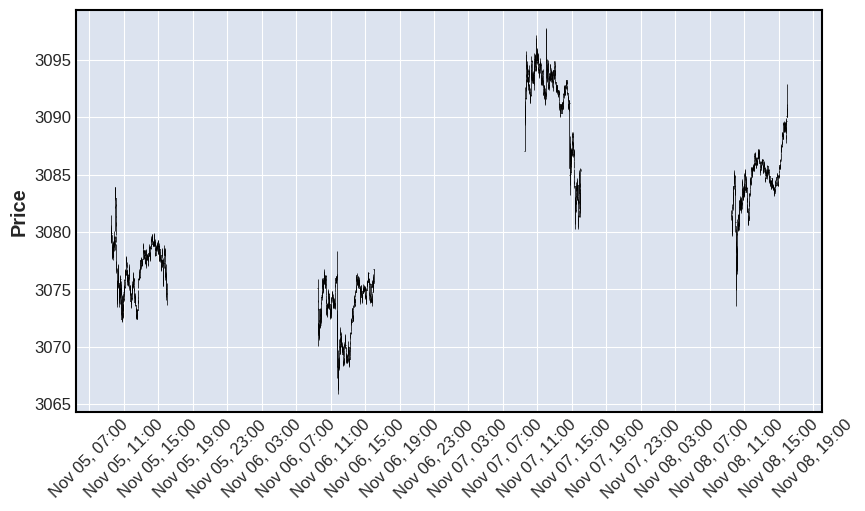

In [27]:
fig

In [28]:
# %load datelocator.py
#import numpy as np
#import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
from   dateutil import parser as dp
import pandas as pd

loc = mdates.AutoDateLocator()

vmin = dp.parse('2021-02-01 09:30')
vmax = dp.parse('2021-02-01 16:00')
print('vmin=',vmin,' vmax=',vmax)
print('type(vmin)=',type(vmin))

ticks = loc.tick_values(vmin, vmax)
print('ticks=')
for dt in mdates.num2date(ticks):
    print(dt)


vmin= 2021-02-01 09:30:00  vmax= 2021-02-01 16:00:00
type(vmin)= <class 'datetime.datetime'>
ticks=
2021-02-01 10:00:00+00:00
2021-02-01 11:00:00+00:00
2021-02-01 12:00:00+00:00
2021-02-01 13:00:00+00:00
2021-02-01 14:00:00+00:00
2021-02-01 15:00:00+00:00
2021-02-01 16:00:00+00:00


In [29]:
loc = mdates.HourLocator()
ticks = loc.tick_values(vmin, vmax)
print('ticks=')
for dt in mdates.num2date(ticks):
    print(dt)

ticks=
2021-02-01 10:00:00+00:00
2021-02-01 11:00:00+00:00
2021-02-01 12:00:00+00:00
2021-02-01 13:00:00+00:00
2021-02-01 14:00:00+00:00
2021-02-01 15:00:00+00:00
2021-02-01 16:00:00+00:00


In [30]:
loc1 = mdates.MinuteLocator(byminute=30,interval=1)

vmin = dp.parse('2021-02-01 07:00')
vmax = dp.parse('2021-02-01 16:00')

ticks = loc1.tick_values(vmin, vmax)
print('ticks=')
for dt in mdates.num2date(ticks):
    print(dt)

ticks=
2021-02-01 07:30:00+00:00
2021-02-01 08:30:00+00:00
2021-02-01 09:30:00+00:00
2021-02-01 10:30:00+00:00
2021-02-01 11:30:00+00:00
2021-02-01 12:30:00+00:00
2021-02-01 13:30:00+00:00
2021-02-01 14:30:00+00:00
2021-02-01 15:30:00+00:00


In [31]:
loc2 = mdates.MinuteLocator(byminute=30,interval=1)
ticks = loc2.tick_values(vmin, vmax)
print('ticks=')
for dt in mdates.num2date(ticks):
    print(dt)

ticks=
2021-02-01 07:30:00+00:00
2021-02-01 08:30:00+00:00
2021-02-01 09:30:00+00:00
2021-02-01 10:30:00+00:00
2021-02-01 11:30:00+00:00
2021-02-01 12:30:00+00:00
2021-02-01 13:30:00+00:00
2021-02-01 14:30:00+00:00
2021-02-01 15:30:00+00:00


In [32]:
vmin = dp.parse('2019-11-05 09:30:00')
vmax = dp.parse('2019-11-08 15:59:00')
print('vmin=',vmin,' vmax=',vmax)
print('type(vmin)=',type(vmin))

ticks = loc.tick_values(vmin, vmax)
print('ticks=')
for dt in mdates.num2date(ticks):
    print(dt)

df = pd.read_csv('../data/SP500_NOV2019_IDay.csv',index_col=0,parse_dates=True)
print('df.shape=',df.shape)
print('df.head(2)=',df.head(2))
print('df.tail(2)=',df.tail(2))

pydtm = df.index.to_pydatetime()
#  loc = mdates.HourLocator(byhour=pydtm,interval=3)
loc = mdates.HourLocator(byhour=(10,12,14,16),interval=1)

ticks = loc.tick_values(pydtm[0],pydtm[-1])
print('ticks=')
for dt in mdates.num2date(ticks):
    print(dt)



vmin= 2019-11-05 09:30:00  vmax= 2019-11-08 15:59:00
type(vmin)= <class 'datetime.datetime'>
ticks=
2019-11-05 10:00:00+00:00
2019-11-05 11:00:00+00:00
2019-11-05 12:00:00+00:00
2019-11-05 13:00:00+00:00
2019-11-05 14:00:00+00:00
2019-11-05 15:00:00+00:00
2019-11-05 16:00:00+00:00
2019-11-05 17:00:00+00:00
2019-11-05 18:00:00+00:00
2019-11-05 19:00:00+00:00
2019-11-05 20:00:00+00:00
2019-11-05 21:00:00+00:00
2019-11-05 22:00:00+00:00
2019-11-05 23:00:00+00:00
2019-11-06 00:00:00+00:00
2019-11-06 01:00:00+00:00
2019-11-06 02:00:00+00:00
2019-11-06 03:00:00+00:00
2019-11-06 04:00:00+00:00
2019-11-06 05:00:00+00:00
2019-11-06 06:00:00+00:00
2019-11-06 07:00:00+00:00
2019-11-06 08:00:00+00:00
2019-11-06 09:00:00+00:00
2019-11-06 10:00:00+00:00
2019-11-06 11:00:00+00:00
2019-11-06 12:00:00+00:00
2019-11-06 13:00:00+00:00
2019-11-06 14:00:00+00:00
2019-11-06 15:00:00+00:00
2019-11-06 16:00:00+00:00
2019-11-06 17:00:00+00:00
2019-11-06 18:00:00+00:00
2019-11-06 19:00:00+00:00
2019-11-06 20:00

In [33]:
import datetime
from   dateutil import parser as dp
from   dateutil import rrule as rr
import dateutil.relativedelta as rd

In [34]:
vmin = dp.parse('2019-11-05 09:30:00')
#vmax = dp.parse('2019-11-08 15:59:00')
vmax = dp.parse('2019-11-05 15:59:00')

In [35]:
delta = rd.relativedelta(vmin,vmax)
type(delta)
delta

dateutil.relativedelta.relativedelta

relativedelta(hours=-6, minutes=-29)

In [36]:
r = rr.rrule(freq=rr.MINUTELY,dtstart=vmin,until=vmax,interval=120)

type(r)

ri = r.__iter__()

ri.__next__()
ri.__next__()
ri.__next__()
ri.__next__()
#ri.__next__()

dateutil.rrule.rrule

datetime.datetime(2019, 11, 5, 9, 30)

datetime.datetime(2019, 11, 5, 11, 30)

datetime.datetime(2019, 11, 5, 13, 30)

datetime.datetime(2019, 11, 5, 15, 30)

In [37]:
list(rr.rrule(freq=rr.MINUTELY,dtstart=vmin,until=vmax,interval=120))

[datetime.datetime(2019, 11, 5, 9, 30),
 datetime.datetime(2019, 11, 5, 11, 30),
 datetime.datetime(2019, 11, 5, 13, 30),
 datetime.datetime(2019, 11, 5, 15, 30)]

In [38]:
vmin = dp.parse('2019-11-05 09:30:00')
vmax = dp.parse('2019-11-05 15:59:00')

delta = rd.relativedelta(vmin,vmax)
delta
delta = - delta / 5.0
delta
print('vmin=',vmin,' vmax=',vmax)
vmin = vmin - delta
vmax = vmax + delta
print('vmin=',vmin,' vmax=',vmax)

relativedelta(hours=-6, minutes=-29)

relativedelta(hours=+1, minutes=+5)

vmin= 2019-11-05 09:30:00  vmax= 2019-11-05 15:59:00
vmin= 2019-11-05 08:25:00  vmax= 2019-11-05 17:04:00


In [39]:
#list(rr.rrule(freq=rr.MINUTELY,byminute=30,dtstart=vmin,until=vmax,interval=120))
list(rr.rrule(freq=rr.MINUTELY,dtstart=vmin,until=vmax,interval=120))

[datetime.datetime(2019, 11, 5, 8, 25),
 datetime.datetime(2019, 11, 5, 10, 25),
 datetime.datetime(2019, 11, 5, 12, 25),
 datetime.datetime(2019, 11, 5, 14, 25),
 datetime.datetime(2019, 11, 5, 16, 25)]

In [40]:
import matplotlib.dates as mdates
from   dateutil import parser as dp

vmin = dp.parse('2021-02-01 09:30')
vmax = dp.parse('2021-02-01 16:00')

loc = mdates.MinuteLocator(30,interval=1)

##  ticks = loc.tick_values(vmin, vmax)
##  print('ticks=')
##  for dt in mdates.num2date(ticks):
##      print(dt)

# for interval in (1,3,20):
#     print('interval =',interval,' ticks=')
#     loc = mdates.MinuteLocator([0,10,20,30,40,50],interval=interval)
#     ticks = loc.tick_values(vmin, vmax)
#     for dt in mdates.num2date(ticks):
#         print(dt)
#     print()

In [41]:
df = pd.read_csv('../data/SP500_NOV2019_IDayRVol.csv',index_col=0,parse_dates=True)
df.index.name = 'Date'
df.shape
df.iloc[[0,1,-2,-1]]

(1563, 5)

,Open,Close,High,Low,Volume
Date,,,,,
2019-11-05 09:30:00,3080.80,3080.49,3081.47,3080.30,2209795
2019-11-05 09:31:00,3080.33,3079.36,3080.33,3079.15,1739410
2019-11-08 15:58:00,3090.73,3091.04,3091.13,3090.58,1231718
2019-11-08 15:59:00,3091.16,3092.91,3092.91,3090.96,1023516


datalimits[0],datalimits[1] = 2019-11-05 08:00:00 2019-11-05 18:00:00

config['xticks']= [18205.33333333 18205.375      18205.41666667 18205.45833333
 18205.5        18205.54166667 18205.58333333 18205.625
 18205.66666667 18205.70833333 18205.75      ]

mdates.num2date(config['xticks'])= ['2019-11-05 08:00:00+00:00', '2019-11-05 09:00:00+00:00', '2019-11-05 10:00:00+00:00', '2019-11-05 11:00:00+00:00', '2019-11-05 12:00:00+00:00', '2019-11-05 13:00:00+00:00', '2019-11-05 14:00:00+00:00', '2019-11-05 15:00:00+00:00', '2019-11-05 16:00:00+00:00', '2019-11-05 17:00:00+00:00', '2019-11-05 18:00:00+00:00']


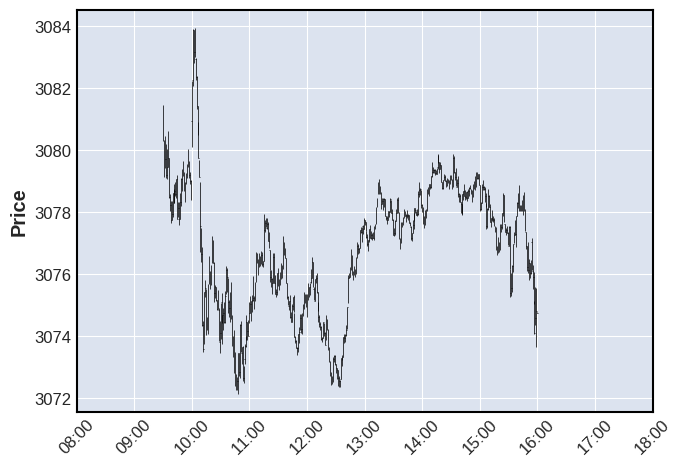

In [42]:
fig, axes = mpf.plot(df.loc['2019-11-05',:],show_nontrading=True,returnfig=True,
                     xticks_version=1,xlim=('2019-11-05 08:00','2019-11-05 18:00'))

/home/dino/code/mplfinance/src/mplfinance/_arg_validators.py:35: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


datalimits[0],datalimits[1] = 2019-11-05 09:30:00 2019-11-08 15:59:00

config['xticks']= [18205.5 18206.  18206.5 18207.  18207.5 18208.  18208.5]

mdates.num2date(config['xticks'])= ['2019-11-05 12:00:00+00:00', '2019-11-06 00:00:00+00:00', '2019-11-06 12:00:00+00:00', '2019-11-07 00:00:00+00:00', '2019-11-07 12:00:00+00:00', '2019-11-08 00:00:00+00:00', '2019-11-08 12:00:00+00:00']

config['xticks']= [150.0, 390.5, 541.0, 781.5, 932.0, 1172.5, 1323.0]


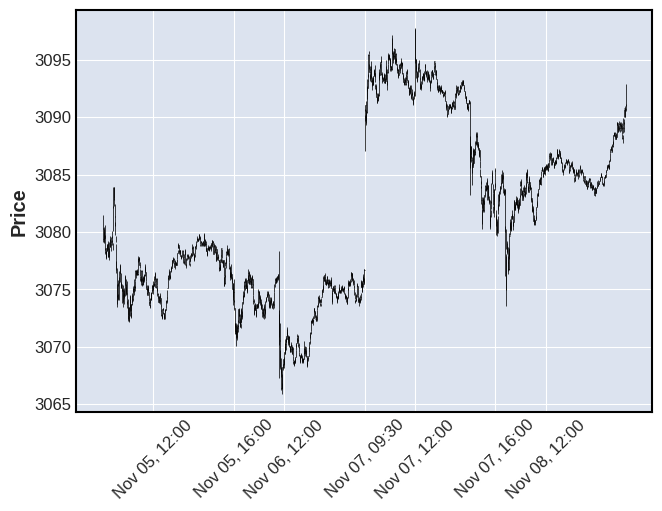

In [43]:
fig, axes = mpf.plot(df,show_nontrading=False,returnfig=True,
                     xticks_version=1)#,xlim=('2019-11-05 08:00','2019-11-06 20:00'))

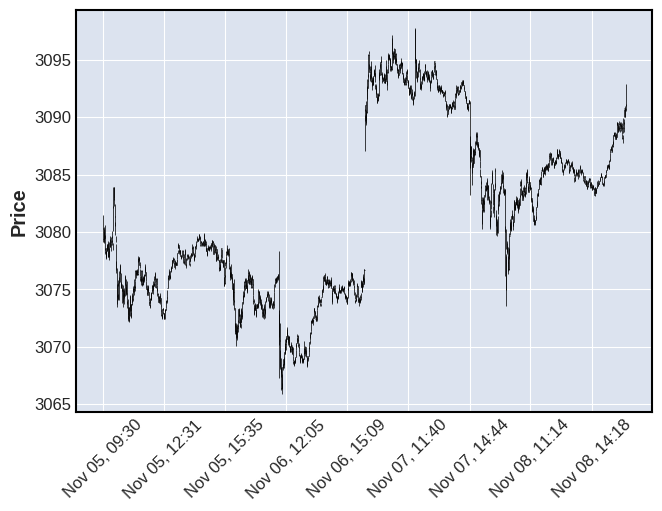

In [44]:
axes[0].xaxis.set_major_locator(mdates.AutoDateLocator())
fig

In [45]:
axes[0].get_xticks()
for mdt in axes[0].get_xticks():
    print(mdates.num2date(mdt))

array([   0.,  181.,  365.,  546.,  730.,  912., 1096., 1277., 1461.])

1970-01-01 00:00:00+00:00
1970-07-01 00:00:00+00:00
1971-01-01 00:00:00+00:00
1971-07-01 00:00:00+00:00
1972-01-01 00:00:00+00:00
1972-07-01 00:00:00+00:00
1973-01-01 00:00:00+00:00
1973-07-01 00:00:00+00:00
1974-01-01 00:00:00+00:00


In [46]:
import mplfinance._utils as mpfutils

In [47]:
for mdt in axes[0].get_xticks():
    print(mpfutils._date_to_iloc_extrapolate(
        df.loc['2019-11-05',:].index.to_series(),
        mdates.num2date(mdt).replace(tzinfo=None))
         )

-26215769.999765236
-25955129.99976757
-25690169.99976994
-25429529.999772277
-25164569.99977465
-24902489.999776997
-24637529.99977937
-24376889.9997817
-24111929.999784075


In [48]:
adl = mdates.AutoDateLocator()

In [49]:
dmin = df.loc['2019-11-05',:].index[0]
dmax = df.loc['2019-11-05',:].index[-1]

In [50]:
adl.tick_values(dmin,dmax)

array([18205.41666667, 18205.45833333, 18205.5       , 18205.54166667,
       18205.58333333, 18205.625     , 18205.66666667])

In [51]:
diffs = [x2-x1 for x1,x2 in zip(df.index[0:],df.index[1:])]

for dif1,dif2 in zip(diffs[0:],diffs[1:]):
    if dif2 != dif1:
        print(True,dif1,dif2)

True 0 days 00:01:00 0 days 17:30:00
True 0 days 17:30:00 0 days 00:01:00
True 0 days 00:01:00 0 days 17:30:00
True 0 days 17:30:00 0 days 00:01:00
True 0 days 00:01:00 0 days 17:30:00
True 0 days 17:30:00 0 days 00:01:00


### Here we try piecing together segments of xticks:

In [52]:
diffs = [x2-x1 for x1,x2 in zip(df.index[0:],df.index[1:])]

In [53]:
len(df.index),len(diffs)
for ix,dx in zip(df.index[386:395],diffs[385:395]):
    print(ix,dx) 

(1563, 1562)

2019-11-05 15:56:00 0 days 00:01:00
2019-11-05 15:57:00 0 days 00:01:00
2019-11-05 15:58:00 0 days 00:01:00
2019-11-05 15:59:00 0 days 00:01:00
2019-11-05 16:00:00 0 days 00:01:00
2019-11-06 09:30:00 0 days 17:30:00
2019-11-06 09:31:00 0 days 00:01:00
2019-11-06 09:32:00 0 days 00:01:00
2019-11-06 09:33:00 0 days 00:01:00


In [54]:
import numpy as np

In [73]:
xticks = []
xmin = df.index[0]
dpr2 = diffs[0]
next_segment = False
for ix,dx in zip(df.index,diffs):
    #print('xmin=',xmin)
    if dx > dpr2:
        xmax = ix
        print('dx,dpr2=',dx,',',dpr2)
        print('xmin,xmax=',xmin,',',xmax)
        xtks = adl.tick_values(xmin,xmax)
        xticks.extend(xtks)
        next_segment = True
    elif next_segment:
        print('assign xmin =',ix)
        xmin = ix
        dpr2 = 2*dx
        next_segment = False
xmax = ix
print('dx,dpr2=',dx,',',dpr2)
print('xmin,xmax=',xmin,',',xmax)
xtks = adl.tick_values(xmin,xmax)
xticks.extend(xtks)

dx,dpr2= 0 days 17:30:00 , 0 days 00:01:00
xmin,xmax= 2019-11-05 09:30:00 , 2019-11-05 16:00:00
assign xmin = 2019-11-06 09:30:00
dx,dpr2= 0 days 17:30:00 , 0 days 00:02:00
xmin,xmax= 2019-11-06 09:30:00 , 2019-11-06 16:00:00
assign xmin = 2019-11-07 09:30:00
dx,dpr2= 0 days 17:30:00 , 0 days 00:02:00
xmin,xmax= 2019-11-07 09:30:00 , 2019-11-07 16:00:00
assign xmin = 2019-11-08 09:30:00
dx,dpr2= 0 days 00:01:00 , 0 days 00:02:00
xmin,xmax= 2019-11-08 09:30:00 , 2019-11-08 15:58:00


In [74]:
from mplfinance._utils import _date_to_iloc_extrapolate

In [84]:
new_xticks = []
for xt in xticks:
    date = mdates.num2date(xt).replace(tzinfo=None)
    new_xt = _date_to_iloc_extrapolate(df.index.to_series(),date)
    new_xticks.append(new_xt)

In [85]:
27/6

4.5

In [86]:
# Throw away every even new_xtick:
len(new_xticks)
new_xticks
new_xticks = [xt for jj,xt in enumerate(new_xticks) if jj%4 == 0 ]
len(new_xticks)
new_xticks

27

[30.0,
 90.0,
 150.0,
 210.0,
 270.0,
 330.0,
 390.0,
 421.0,
 481.0,
 541.0,
 601.0,
 661.0,
 721.0,
 781.0,
 812.0,
 872.0,
 932.0,
 992.0,
 1052.0,
 1112.0,
 1172.0,
 1203.0,
 1263.0,
 1323.0,
 1383.0,
 1443.0,
 1503.0]

7

[30.0, 270.0, 481.0, 721.0, 932.0, 1172.0, 1383.0]

/home/dino/code/mplfinance/src/mplfinance/_arg_validators.py:35: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


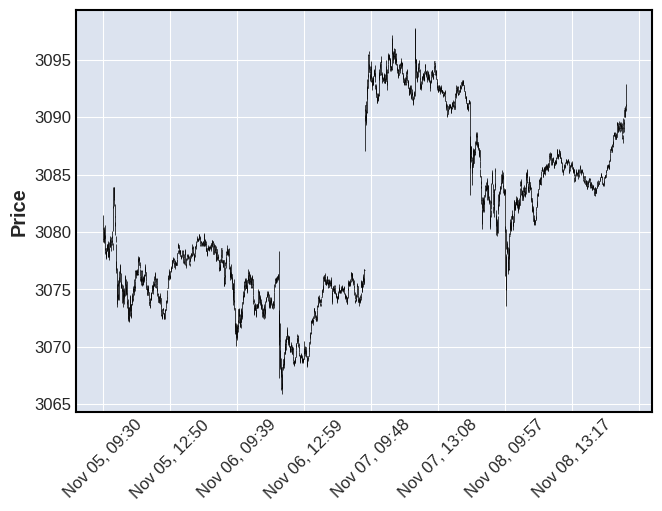

In [87]:
fig,axes = mpf.plot(df,returnfig=True)

In [88]:
axes[0].set_xticks(new_xticks)

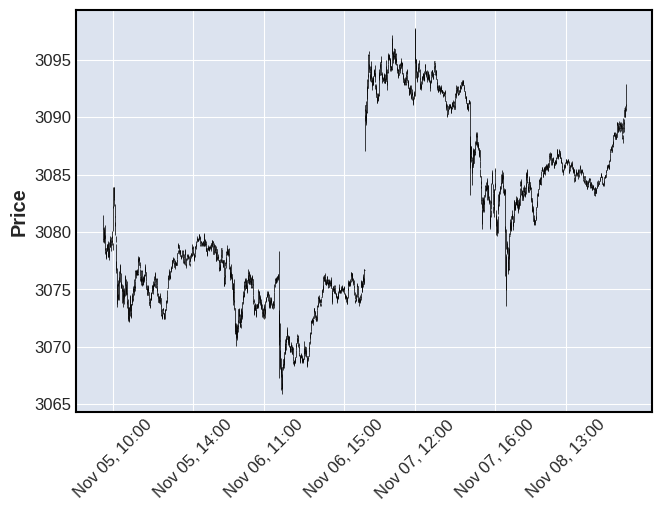

In [89]:
fig